In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ad6af36a-02a3-4b03-b8bd-42a5b320f2f4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', None)

In [4]:
# Normalize the data, easier to view in dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977467e+07,1.977467e+07,False,NaN,1,NaN,NaN,None,2024-10-29T09:49:00.000Z,71159.682695,4.771352e+10,120.6660,0.071366,4.238582,6.442456,8.438617,19.350089,7.438422,1.407159e+12,58.5089,1.494353e+12,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204048e+08,1.204048e+08,True,NaN,2,NaN,NaN,None,2024-10-29T09:49:00.000Z,2622.013017,2.167362e+10,75.4757,-0.111194,4.500073,0.162056,-1.080633,3.844109,-20.979707,3.157030e+11,13.1268,3.157030e+11,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
2,825,Tether USDt,USDT,tether,101829,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-29T09:49:00.000Z,0.999169,7.859403e+10,84.5414,-0.004083,0.042080,-0.029154,-0.101082,-0.082390,-0.040792,1.202393e+11,4.9998,1.212371e+11,None,2024-10-29T09:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-29 17:53:12.790293
3,1839,BNB,BNB,bnb,2272,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459310e+08,1.459310e+08,False,NaN,4,NaN,NaN,None,2024-10-29T09:49:00.000Z,606.128573,1.784650e+09,21.9368,0.077436,2.485632,3.022991,1.561515,12.722624,3.267452,8.845296e+10,3.6778,8.845296e+10,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702705e+08,5.873915e+08,True,NaN,5,NaN,NaN,None,2024-10-29T09:49:00.000Z,180.764445,4.003556e+09,46.8617,-0.209243,2.334467,10.262072,15.581724,29.203603,-1.711302,8.500819e+10,3.5346,1.061795e+11,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
5,3408,USDC,USDC,usd-coin,22709,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.466200e+10,3.466200e+10,False,NaN,6,NaN,NaN,None,2024-10-29T09:49:00.000Z,0.999804,8.579844e+09,86.7184,-0.014579,-0.012990,-0.000736,-0.019053,-0.006638,-0.010213,3.465519e+10,1.4410,3.465519e+10,None,2024-10-29T09:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-29 17:53:12.790293
6,52,XRP,XRP,xrp,1412,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-29T09:49:00.000Z,0.523508,9.941307e+08,64.9734,-0.183576,1.254309,-1.729456,-16.510452,-7.199278,-19.210098,2.974146e+10,1.2366,5.235079e+10,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465668e+11,1.465668e+11,True,NaN,8,NaN,NaN,None,2024-10-29T09:49:00.000Z,0.164641,3.787806e+09,140.0904,-0.140682,15.231572,15.948681,29.744335,62.039062,30.562986,2.413090e+10,1.0033,2.413090e+10,None,2024-10-29T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:53:12.790293
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.647713e+10,8

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ad6af36a-02a3-4b03-b8bd-42a5b320f2f4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    
    # Create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'C:\Users\hnswp\OneDrive\Documentos\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\hnswp\OneDrive\Documentos\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\hnswp\OneDrive\Documentos\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed successfully')
    sleep(60) # Sleep for 1 minute
exit()

API Runner Completed successfully
API Runner Completed successfully


KeyboardInterrupt: 

In [14]:
df72 = pd.read_csv(r'C:\Users\hnswp\OneDrive\Documentos\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11790,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977407e+07,1.977407e+07,False,NaN,1,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,67851.901929,1.913812e+10,23.3446,0.048465,1.152167,-1.463156,3.078192,13.869275,1.655080,1.341708e+12,58.3578,1.424890e+12,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
1,1,1027,Ethereum,ETH,ethereum,9455,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204033e+08,1.204033e+08,True,NaN,2,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,2487.938748,1.137821e+10,5.4113,0.151444,0.455364,-8.935808,-7.191932,-2.475331,-25.218018,2.995560e+11,13.0292,2.995560e+11,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
2,2,825,Tether USDt,USDT,tether,101641,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,0.998665,3.894171e+10,-51.4764,-0.004331,0.003272,-0.143266,-0.147333,-0.155485,-0.117847,1.201787e+11,5.2272,1.211760e+11,NaN,2024-10-28T06:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 15:01:00.478803
3,3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459311e+08,1.459311e+08,False,NaN,4,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,587.887362,1.429227e+09,5.9334,0.041375,0.697963,-3.371945,-2.373272,8.294567,2.479471,8.579104e+10,3.7316,8.579104e+10,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
4,4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.702891e+08,5.874024e+08,True,NaN,5,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,174.104241,2.702106e+09,25.2224,-0.072027,0.684386,2.752914,11.266373,20.237694,-4.619735,8.187932e+10,3.5614,1.022693e+11,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
5,5,3408,USDC,USDC,usd-coin,22684,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.464253e+10,3.464253e+10,False,NaN,6,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,0.999955,4.020793e+09,17.4771,0.005325,0.011531,-0.042933,-0.001636,-0.009279,-0.010930,3.464096e+10,1.5068,3.464096e+10,NaN,2024-10-28T06:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 15:01:00.478803
6,6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,0.514317,5.592259e+08,5.5633,0.235011,0.039844,-6.376708,-12.518055,-10.631629,-13.952462,2.921930e+10,1.2709,5.143169e+10,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
7,7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.465514e+11,1.465514e+11,True,NaN,8,NaN,NaN,NaN,2024-10-28T06:58:00.000Z,0.142932,1.493453e+09,85.9033,-0.266138,3.524925,-3.166813,15.882828,41.245572,10.678005,2.094692e+10,0.9112,2.094692e+10,NaN,2024-10-28T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:01:00.478803
8,8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.6483

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977467e+07,1.977467e+07,False,NaN,1,NaN,NaN,None,2024-10-29T09:52:00.000Z,71138.833883,4.773919e+10,120.3513,0.051112,3.995925,6.373159,8.452491,19.315249,7.341119,1.406747e+12,58.5089,1.493916e+12,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204048e+08,1.204048e+08,True,NaN,2,NaN,NaN,None,2024-10-29T09:52:00.000Z,2620.732189,2.165086e+10,74.7592,-0.146973,3.920436,0.096550,-1.084993,3.774273,-21.076125,3.155488e+11,13.1242,3.155488e+11,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
2,825,Tether USDt,USDT,tether,101829,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.999144,7.859972e+10,84.1769,-0.012798,0.050174,-0.044138,-0.092096,-0.080284,-0.046335,1.202363e+11,4.9997,1.212340e+11,None,2024-10-29T09:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-29 17:54:13.905388
3,1839,BNB,BNB,bnb,2272,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459310e+08,1.459310e+08,False,NaN,4,NaN,NaN,None,2024-10-29T09:52:00.000Z,605.743900,1.782664e+09,21.4478,0.044836,2.245133,2.899029,1.508619,12.620409,3.273972,8.839682e+10,3.6766,8.839682e+10,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702705e+08,5.873915e+08,True,NaN,5,NaN,NaN,None,2024-10-29T09:52:00.000Z,180.745873,4.003165e+09,46.8871,-0.183270,2.104244,10.254222,15.664053,29.105535,-1.675726,8.499946e+10,3.5356,1.061686e+11,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
5,3408,USDC,USDC,usd-coin,22709,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.466200e+10,3.466200e+10,False,NaN,6,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.999901,8.578331e+09,86.5960,-0.008939,0.007005,-0.013937,-0.001739,-0.002955,-0.007008,3.465856e+10,1.4415,3.465856e+10,None,2024-10-29T09:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-29 17:54:13.905388
6,52,XRP,XRP,xrp,1412,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.523508,9.950143e+08,65.0110,-0.159430,1.146109,-1.756221,-16.572904,-7.223373,-19.058410,2.974149e+10,1.2371,5.235085e+10,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465668e+11,1.465668e+11,True,NaN,8,NaN,NaN,None,2024-10-29T09:51:00.000Z,0.164285,3.788486e+09,140.1017,-0.326421,14.939892,15.709850,29.460303,61.698810,30.290546,2.407874e+10,1.0013,2.407874e+10,None,2024-10-29T09:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.647713e+10,8.

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19774671.00000,19774671.00000,False,NaN,1,NaN,NaN,None,2024-10-29T09:52:00.000Z,71138.83388,47739187872.19215,120.35130,0.05111,3.99592,6.37316,8.45249,19.31525,7.34112,1406747035357.13672,58.50890,1493915511539.97998,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120404808.84310,120404808.84310,True,NaN,2,NaN,NaN,None,2024-10-29T09:52:00.000Z,2620.73219,21650861401.51458,74.75920,-0.14697,3.92044,0.09655,-1.08499,3.77427,-21.07612,315548758275.42157,13.12420,315548758275.41998,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
2,825,Tether USDt,USDT,tether,101829,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120339320856.06236,121337925862.68210,True,NaN,3,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.99914,78599722753.35999,84.17690,-0.01280,0.05017,-0.04414,-0.09210,-0.08028,-0.04633,120236278311.84357,4.99970,121234028246.32001,None,2024-10-29T09:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-29 17:54:13.905388
3,1839,BNB,BNB,bnb,2272,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931015.76008,145931015.76008,False,NaN,4,NaN,NaN,None,2024-10-29T09:52:00.000Z,605.74390,1782663783.06023,21.44780,0.04484,2.24513,2.89903,1.50862,12.62041,3.27397,88396822555.99411,3.67660,88396822555.99001,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470270522.34792,587391543.34875,True,NaN,5,NaN,NaN,None,2024-10-29T09:52:00.000Z,180.74587,4003164998.73018,46.88710,-0.18327,2.10424,10.25422,15.66405,29.10554,-1.67573,84999456028.33884,3.53560,106168597195.96001,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
5,3408,USDC,USDC,usd-coin,22709,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34661999061.30506,34661999061.30506,False,NaN,6,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.99990,8578330553.98030,86.59600,-0.00894,0.00701,-0.01394,-0.00174,-0.00296,-0.00701,34658555316.61916,1.44150,34658555316.62000,None,2024-10-29T09:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-29 17:54:13.905388
6,52,XRP,XRP,xrp,1412,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,None,2024-10-29T09:52:00.000Z,0.52351,995014293.07514,65.01100,-0.15943,1.14611,-1.75622,-16.57290,-7.22337,-19.05841,29741492280.73841,1.23710,52350848460.85000,None,2024-10-29T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 17:54:13.905388
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146566776383.70523,146566776383.70523,True,NaN,8,NaN,NaN,None,2024-10-29T09:51:00.000Z,0.16429,3788485966.98221,140.10170,-0.32642,14.93989,15.70985,29.46030,61.69881,30.29055,24078744597.23956,1.00130,24078744597.24000,None,2024-10-29T09:51:00.000Z,NaN,

In [18]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05111,3.99592,6.37316,8.45249,19.31525,7.34112
Ethereum,-0.14697,3.92044,0.09655,-1.08499,3.77427,-21.07612
Tether USDt,-0.01280,0.05017,-0.04414,-0.09210,-0.08028,-0.04633
BNB,0.04484,2.24513,2.89903,1.50862,12.62041,3.27397
Solana,-0.18327,2.10424,10.25422,15.66405,29.10554,-1.67573
USDC,-0.00894,0.00701,-0.01394,-0.00174,-0.00296,-0.00701
XRP,-0.15943,1.14611,-1.75622,-16.57290,-7.22337,-19.05841
Dogecoin,-0.32642,14.93989,15.70985,29.46030,61.69881,30.29055
TRON,-0.00401,0.22733,2.97701,5.32154,1.85998,24.13001


In [19]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.05111
              quote.USD.percent_change_24h     3.99592
              quote.USD.percent_change_7d      6.37316
              quote.USD.percent_change_30d     8.45249
              quote.USD.percent_change_60d    19.31525
              quote.USD.percent_change_90d     7.34112
Ethereum      quote.USD.percent_change_1h     -0.14697
              quote.USD.percent_change_24h     3.92044
              quote.USD.percent_change_7d      0.09655
              quote.USD.percent_change_30d    -1.08499
              quote.USD.percent_change_60d     3.77427
              quote.USD.percent_change_90d   -21.07612
Tether USDt   quote.USD.percent_change_1h     -0.01280
              quote.USD.percent_change_24h     0.05017
              quote.USD.percent_change_7d     -0.04414
              quote.USD.percent_change_30d    -0.09210
              quote.USD.percent_change_60d    -0.08028
              quote.US

In [20]:
type(df4)

pandas.core.series.Series

In [21]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.05111
             quote.USD.percent_change_24h   3.99592
             quote.USD.percent_change_7d    6.37316
             quote.USD.percent_change_30d   8.45249
             quote.USD.percent_change_60d  19.31525
             quote.USD.percent_change_90d   7.34112
Ethereum     quote.USD.percent_change_1h   -0.14697
             quote.USD.percent_change_24h   3.92044
             quote.USD.percent_change_7d    0.09655
             quote.USD.percent_change_30d  -1.08499
             quote.USD.percent_change_60d   3.77427
             quote.USD.percent_change_90d -21.07612
Tether USDt  quote.USD.percent_change_1h   -0.01280
             quote.USD.percent_change_24h   0.05017
             quote.USD.percent_change_7d   -0.04414
             quote.USD.percent_change_30d  -0.09210
             quote.USD.percent_change_60d  -0.08028
             quote.USD.percent_change_90d  -0.04633
BNB          quote.USD.percent_change_1h    0.04484
             quote.USD.percent_change_24h   2.24513
             quote.USD.percent_change_7d    2.89903
             quote.USD.percent_change_30d   1.50862
             quote.USD.percent_change_60d  12.62041
             quote.USD.percent_change_90d   3.27397
Solana       quote.USD.percent_change_1h   -0.18327
             quote.USD.percent_change_24h   2.10424
             quote.USD.percent_change_7d   10.25422
             quote.USD.percent_change_30d  15.66405
             quote.USD.percent_change_60d  29.10554
             quote.USD.percent_change_90d  -1.67573
USDC         quote.USD.percent_change_1h   -0.00894
             quote.USD.percent_change_24h   0.00701
             quote.USD.percent_change_7d   -0.01394
             quote.USD.percent_change_30d  -0.00174
             quote.USD.percent_change_60d  -0.00296
             quote.USD.percent_change_90d  -0.00701
XRP          quote.USD.percent_change_1h   -0.15943
             quote.USD.percent_change_24h   1.14611
             quote.USD.percent_change_7d   -1.75622
             quote.USD.percent_change_30d -16.57290
             quote.USD.percent_change_60d  -7.22337
             quote.USD.percent_change_90d -19.05841
Dogecoin     quote.USD.percent_change_1h   -0.32642
             quote.USD.percent_change_24h  14.93989
             quote.USD.percent_change_7d   15.70985
             quote.USD.percent_change_30d  29.46030
             quote.USD.percent_change_60d  61.69881
             quote.USD.percent_change_90d  30.29055
TRON         quote.USD.percent_change_1h   -0.00401
             quote.USD.percent_change_24h   0.22733
             quote.USD.percent_change_7d    2.97701
             quote.USD.percent_change_30d   5.32154
             quote.USD.percent_change_60d   1.85998
             quote.USD.percent_change_90d  24.13001
Toncoin      quote.USD.percent_change_1h    0.21314
             quote.USD.percent_change_24h   0.84497
             quote.USD.percent_change_7d   -3.41076
             quote.USD.percent_change_30d -13.32939
             quote.USD.percent_change_60d  -7.41067
             quote.USD.percent_change_90d -26.37173
Cardano      quote.USD.percent_change_1h   -0.07378
             quote.USD.percent_change_24h   2.94048
             quote.USD.percent_change_7d   -3.44748
             quote.USD.percent_change_30d -12.65572
             quote.USD.percent_change_60d  -3.47171
             quote.USD.percent_change_90d -13.62943
Shiba Inu    quote.USD.percent_change_1h    0.93992
             quote.USD.percent_change_24h   8.68039
             quote.USD.percent_change_7d    2.15906
             quote.USD.percent_change_30d  -6.13374
             quote.USD.percent_change_60d  30.26281
             quote.USD.percent_change_90d  12.68174
Avalanche    quote.USD.percent_change_1h   -0.30111
             quote.USD.percent_change_24h   2.66085
             quote.USD.percent_change_7d   -2.94153
             quote.USD.percent_change_30d

In [22]:
type(df5)

pandas.core.frame.DataFrame

In [23]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05111
1,Bitcoin,quote.USD.percent_change_24h,3.99592
2,Bitcoin,quote.USD.percent_change_7d,6.37316
3,Bitcoin,quote.USD.percent_change_30d,8.45249
4,Bitcoin,quote.USD.percent_change_60d,19.31525
5,Bitcoin,quote.USD.percent_change_90d,7.34112
6,Ethereum,quote.USD.percent_change_1h,-0.14697
7,Ethereum,quote.USD.percent_change_24h,3.92044
8,Ethereum,quote.USD.percent_change_7d,0.09655
9,Ethereum,quote.USD.percent_change_30d,-1.08499


In [24]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05111
1,Bitcoin,quote.USD.percent_change_24h,3.99592
2,Bitcoin,quote.USD.percent_change_7d,6.37316
3,Bitcoin,quote.USD.percent_change_30d,8.45249
4,Bitcoin,quote.USD.percent_change_60d,19.31525
5,Bitcoin,quote.USD.percent_change_90d,7.34112
6,Ethereum,quote.USD.percent_change_1h,-0.14697
7,Ethereum,quote.USD.percent_change_24h,3.92044
8,Ethereum,quote.USD.percent_change_7d,0.09655
9,Ethereum,quote.USD.percent_change_30d,-1.08499


In [25]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05111
1,Bitcoin,24h,3.99592
2,Bitcoin,7d,6.37316
3,Bitcoin,30d,8.45249
4,Bitcoin,60d,19.31525
5,Bitcoin,90d,7.34112
6,Ethereum,1h,-0.14697
7,Ethereum,24h,3.92044
8,Ethereum,7d,0.09655
9,Ethereum,30d,-1.08499


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

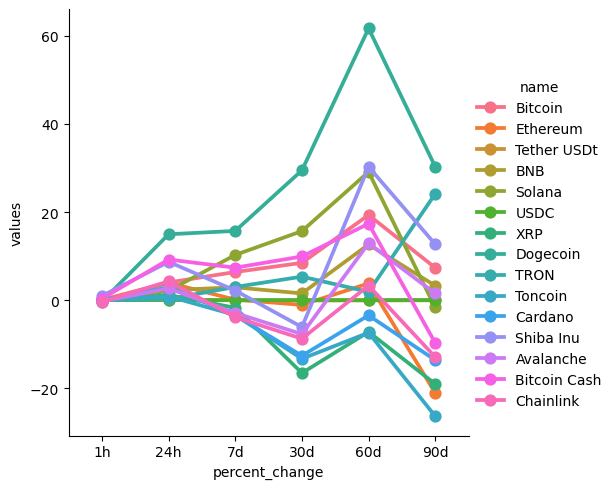

In [27]:
sns.catplot(x = 'percent_change', y = 'values', hue='name', data = df7, kind = 'point')

In [28]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,71138.83388,2024-10-29 17:54:13.905388


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

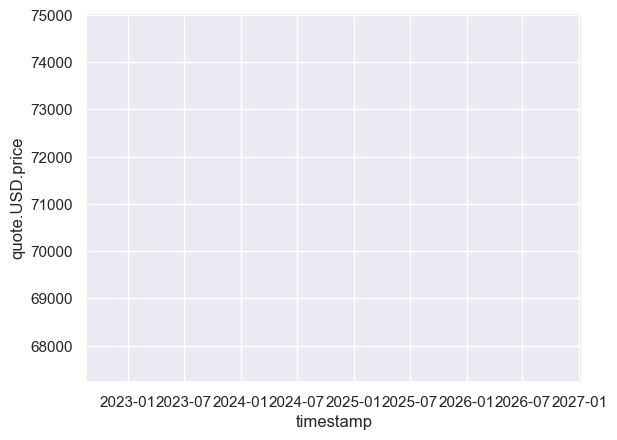

In [29]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)